In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


file_name = 'desafio01consumidor.csv'

data = pd.read_csv(file_name)

print(data.head())

  id_cliente  idade  renda      produto     regiao-BR  pre-pandemia
0  XXXXXXX72     30   7452        batom       Sudeste             1
1  XXXXXXX15     59    837  desodorante      Nordeste             1
2  XXXXXXX70     28   3231       sombra  Centro-Oeste             1
3  XXXXXXX99     27   5409        batom           Sul             1
4  XXXXXXX98     24   1142        batom       Sudeste             1


In [ ]:
#Porcentagem de pessoas pré e pós-pandemia que compravam no site, normalizando os valores:
porcentagem_compra_pre_e_pos = data['pre-pandemia'].value_counts(normalize = True).round(4) * 100
print(porcentagem_compra_pre_e_pos)

pre-pandemia
0    50.25
1    49.75
Name: proportion, dtype: float64


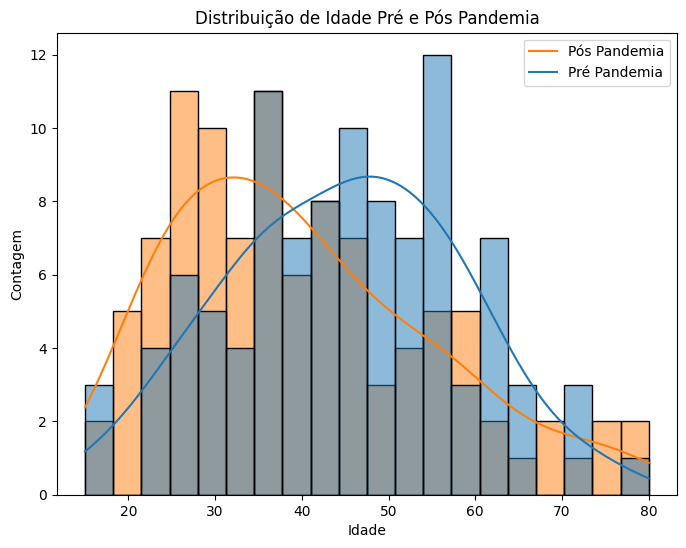

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='idade', hue='pre-pandemia', bins=20, kde=True)
plt.title('Distribuição de Idade Pré e Pós Pandemia')
plt.xlabel('Idade')
plt.ylabel('Contagem')
plt.legend(['Pós Pandemia', 'Pré Pandemia'])
plt.show()

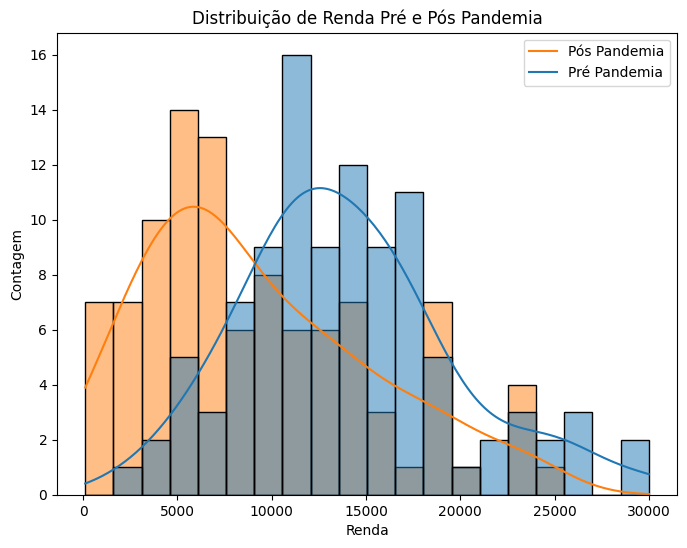

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='renda', hue='pre-pandemia', bins=20, kde=True)
plt.title('Distribuição de Renda Pré e Pós Pandemia')
plt.xlabel('Renda')
plt.ylabel('Contagem')
plt.legend(['Pós Pandemia', 'Pré Pandemia'])
plt.show()

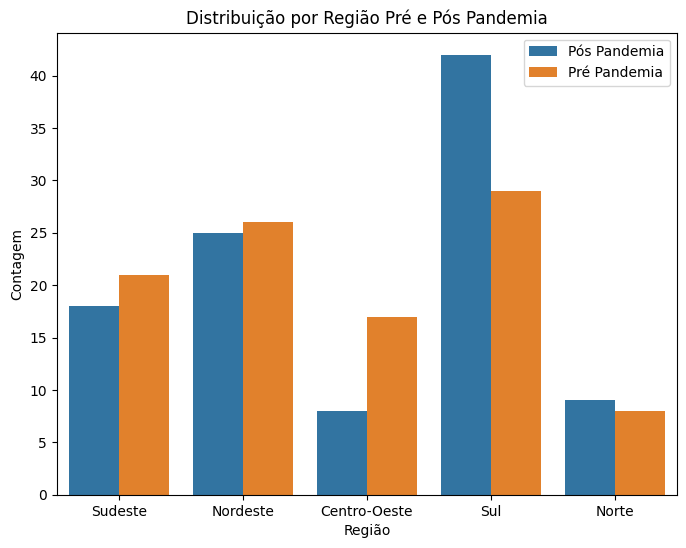

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='regiao-BR', hue='pre-pandemia')
plt.title('Distribuição por Região Pré e Pós Pandemia')
plt.xlabel('Região')
plt.ylabel('Contagem')
plt.legend(['Pós Pandemia', 'Pré Pandemia'])
plt.show()

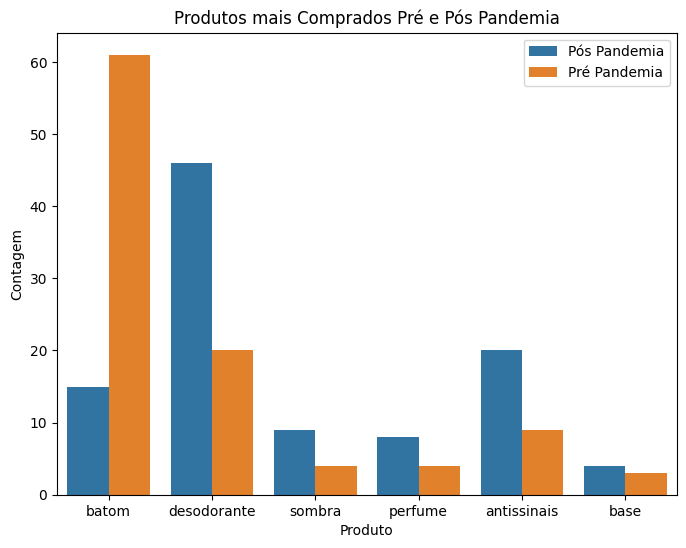

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='produto', hue='pre-pandemia')
plt.title('Produtos mais Comprados Pré e Pós Pandemia')
plt.xlabel('Produto')
plt.ylabel('Contagem')
plt.legend(['Pós Pandemia', 'Pré Pandemia'])
plt.show()

2. Você notou diferenças nítidas pré e pós pandemia? Como você poderia
provar estatisticamente que essas diferenças são significativas ? (pergunta
extra)

In [ ]:
# Teste t para idade
t_stat_idade, p_valor_idade = stats.ttest_ind(data[data['pre-pandemia'] == 1]['idade'], data[data['pre-pandemia'] == 0]['idade'])

print("Teste t para idade:")
print("Estatística:", t_stat_idade)
print("Valor p:", p_valor_idade)

Teste t para idade:
Estatística: -2.5162646871061667
Valor p: 0.012642487337309232


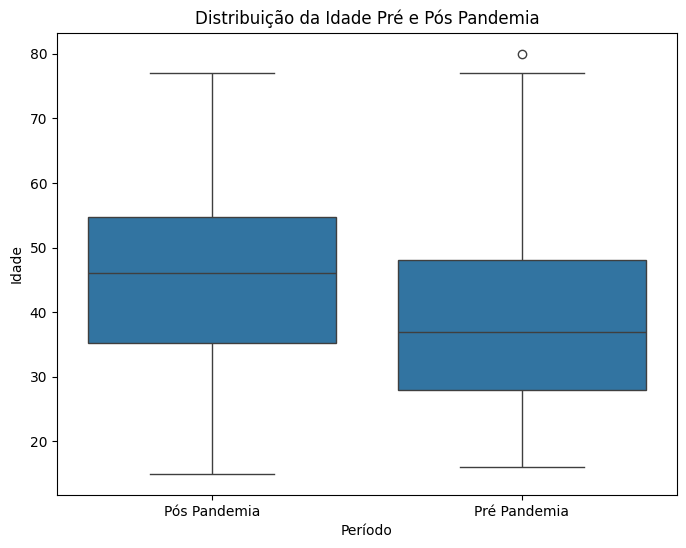

In [ ]:
# Teste t para idade gráfico
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='pre-pandemia', y='idade')
plt.title('Distribuição da Idade Pré e Pós Pandemia')
plt.xlabel('Período')
plt.ylabel('Idade')
plt.xticks(ticks=[0, 1], labels=['Pós Pandemia', 'Pré Pandemia'])
plt.show()

In [ ]:
# Teste t para renda
t_stat_renda, p_valor_renda = stats.ttest_ind(data[data['pre-pandemia'] == 1]['renda'], data[data['pre-pandemia'] == 0]['renda'])

print('\nTeste t para renda:')
print(f'Estatística: {t_stat_renda}')
print(f'Valor p: {p_valor_renda}')


Teste t para renda:
Estatística: -5.8539120969193865
Valor p: 1.9295804375445438e-08


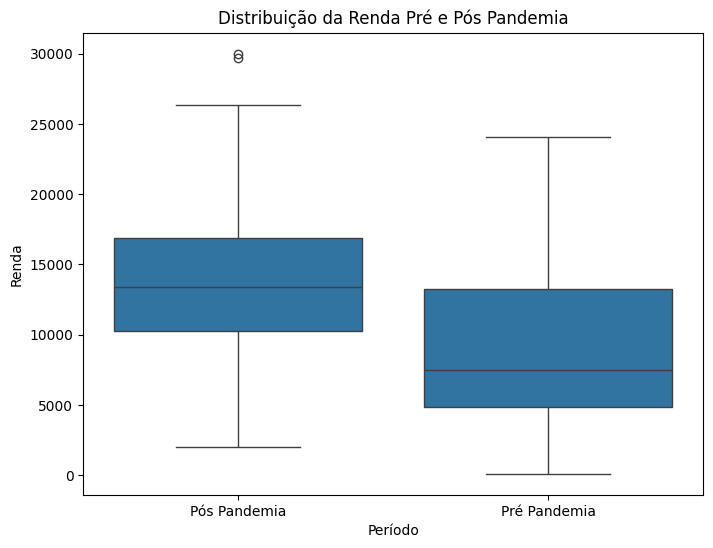

In [ ]:
# Teste t para renda gráfico
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='pre-pandemia', y='renda')
plt.title('Distribuição da Renda Pré e Pós Pandemia')
plt.xlabel('Período')
plt.ylabel('Renda')
plt.xticks(ticks=[0, 1], labels=['Pós Pandemia', 'Pré Pandemia'])
plt.show()

In [ ]:
# Teste de proporção para região
regiao_pre = data[data['pre-pandemia'] == 1]['regiao-BR'].value_counts(normalize=True)
regiao_pos = data[data['pre-pandemia'] == 0]['regiao-BR'].value_counts(normalize=True)

_, p_valor_regiao = stats.chisquare(regiao_pre, f_exp=regiao_pos)

print("\nTeste de proporção para região:")
print("Valor p:", p_valor_regiao)


Teste de proporção para região:
Valor p: 0.9983640921183393


<Figure size 800x600 with 0 Axes>

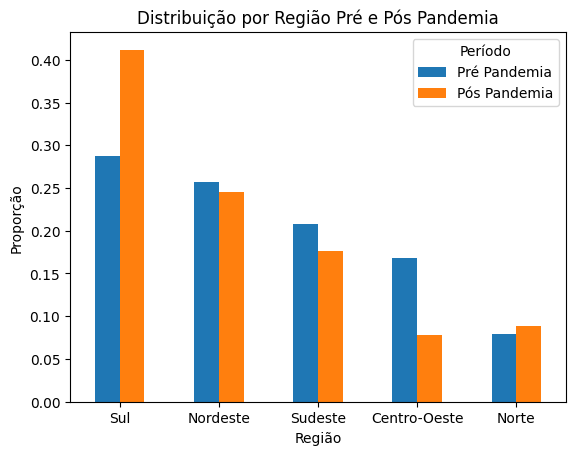

In [ ]:
# Teste de proporção para região gráfico
plt.figure(figsize=(8, 6))
regiao_comparison = pd.concat([regiao_pre, regiao_pos], axis=1)
regiao_comparison.columns = ['Pré Pandemia', 'Pós Pandemia']
regiao_comparison.plot(kind='bar')
plt.title('Distribuição por Região Pré e Pós Pandemia')
plt.xlabel('Região')
plt.ylabel('Proporção')
plt.xticks(rotation=0)
plt.legend(title='Período')
plt.show()

In [ ]:
# Teste de proporção para produtos mais comprados
produtos_pre = data[data['pre-pandemia'] == 1]['produto'].value_counts(normalize=True)
produtos_pos = data[data['pre-pandemia'] == 0]['produto'].value_counts(normalize=True)

_, p_valor_produtos = stats.chisquare(produtos_pre, f_exp=produtos_pos)

print("\nTeste de proporção para produtos mais comprados:")
print("Valor p:", p_valor_produtos)


Teste de proporção para produtos mais comprados:
Valor p: 0.9997294355138717


<Figure size 800x600 with 0 Axes>

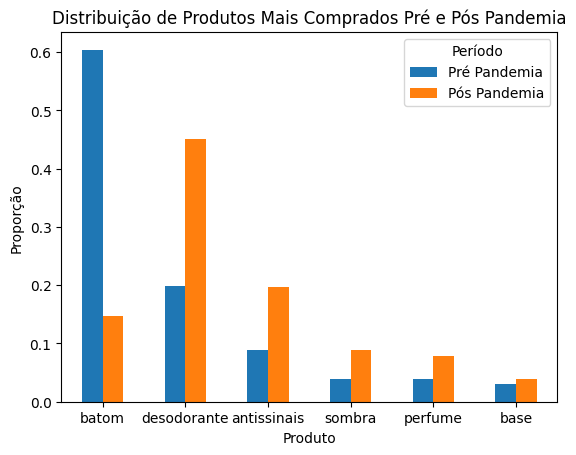

In [ ]:
# Teste de proporção para produtos mais comprados gráfico
plt.figure(figsize=(8, 6))
produtos_comparison = pd.concat([produtos_pre, produtos_pos], axis=1)
produtos_comparison.columns = ['Pré Pandemia', 'Pós Pandemia']
produtos_comparison.plot(kind='bar')
plt.title('Distribuição de Produtos Mais Comprados Pré e Pós Pandemia')
plt.xlabel('Produto')
plt.ylabel('Proporção')
plt.xticks(rotation=0)
plt.legend(title='Período')
plt.show()

Pelos testes estatisticos houve perfil diferente na idade e na renda entre os compradores no período pré e pós pandêmico. No período pós-pandêmico temos um perfil de clientes com maior idade e renda se comparado com o pré-pandêmico. Possivelmente são aposentados, e não sofreram grandes impactos na renda com a pandemia.

3. Suponha agora que os dados recebidos são somente uma amostra da sua
população total de clientes. Suponha que a sua "população" de clientes
verdadeira é de 100000. Qual o tamanho da amostra necessária para
chegarmos a conclusões com 95% de confiança e 2% de margem de erro? A
base informada é suficiente? E com uma margem de erro de 10%?


In [ ]:
p = 0.5
z = 1.96 #para um intervalo de confiança de 95%

#Intervalo de confiança de 95%  e 2% de margem de erro

n2= (100000 * (z**2)*p*(1-p))/((100000 - 1) * (0.02**2) + (z**2)*p*(1-p))

print(f"O tamanho da amostra necessária para chegarmos a conclusões com 95% de confiança e 2% é de: {(round(n2,0))}")

#Intervalo de confiança de 95%  e 10% de margem de erro

n10= (100000 * (z**2)*p*(1-p))/((100000 - 1) * (0.1**2) + (z**2)*p*(1-p))

print(f"O tamanho da amostra necessária para chegarmos a conclusões com 95% de confiança e 10% é de: {(round(n10,0))}")



O tamanho da amostra necessária para chegarmos a conclusões com 95% de confiança e 2% é de: 2345.0
O tamanho da amostra necessária para chegarmos a conclusões com 95% de confiança e 10% é de: 96.0


Para o intervalo de confiança de 95% e margem de erro de 2%, a amostra fornecida é insuficiente. Já para intervalo de confiança de 95% e margem de erro de 10%, a amostra fornecidade é suficiente.